# Assignment 1: Dimensionality Reduction

This notebook is a starter template for your assignment. Please fill in the required functions and complete the analysis as described in the assignment instructions.

**IMPORTANT**: Do not change the function names or the function parameters, as they will be used by the grading script.


In [77]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import time

## Data Loading

In [78]:
def load_data(file_path):
    """
    Load the dataset from a given file path.
    Args:
        file_path: str, path to the data file
    Returns:
        data: numpy array of shape (n_samples, n_features)
    """
    df = np.loadtxt(file_path)
    return df


In [79]:
#load data
df = load_data("/Users/liz/Desktop/CS521/github/Soliz01/asgmnt-1-Soliz01/data/Asgmnt1_data.txt")

In [80]:
#print results
print(type(df))
print(df.shape)
print(df[:5])

<class 'numpy.ndarray'>
(16000, 128)
[[  49.453511     37.213064     38.600731     47.251342     21.792191
    12.224262     -3.7136485   -34.253242    -26.037303    -15.913134
   -51.096483    -25.872638    -35.067489    -45.702715    -47.742929
   -59.234083    -65.946738    -71.318081    -58.019709    -83.69879
  -139.79711    -101.57172     -92.582577    -81.728295    -77.49389
  -127.85409     -97.469249   -111.31852    -123.35508    -121.51637
  -125.10259    -123.96317    -123.94281    -143.73965    -152.5089
  -113.27672    -137.65092    -105.30779    -152.1031     -145.20114
  -104.2706     -103.60206    -151.07493    -124.791      -100.21476
   -98.192358   -148.05352     -87.202275   -103.26303    -108.59445
  -114.0258     -124.94321     -99.577597   -102.22275     -46.261721
   -83.81665     -86.02834     -77.584358    -84.115838    -24.809243
   -47.72934     -53.050846    -26.03087     -42.989431    -38.010516
   -40.829788    -35.577655     15.309159      5.1142019    -

## Data Normalization
Perform row-wise normalization on the input data.

In [81]:
## Normalization
def normalize_data(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    
    # avoid division by zero
    stds[stds == 0] = 1
    
    X_norm = (X - means) / stds
    return X_norm

In [82]:
#normalized data
## check code
ndf = normalize_data(df)

In [83]:
#do these results look correct?
#print results
print(ndf[:5])
print(np.mean(ndf, axis=0))
print(np.std(ndf, axis=0))
print(ndf.shape)

[[ 0.59000293  0.4420177   0.4610876   0.56188311  0.2629454   0.14449439
  -0.0392948  -0.40395838 -0.30439212 -0.18035075 -0.59864752 -0.29974843
  -0.40792004 -0.53155317 -0.55885874 -0.69338993 -0.76884332 -0.83702642
  -0.67769887 -0.98081673 -1.64388068 -1.19090074 -1.08511244 -0.95548383
  -0.90359185 -1.50473988 -1.14498094 -1.31141836 -1.46045364 -1.43640588
  -1.48640818 -1.47292617 -1.47561894 -1.71235648 -1.82455241 -1.36045664
  -1.6518963  -1.25958007 -1.82203653 -1.74526795 -1.2526576  -1.23707896
  -1.80813539 -1.489479   -1.19927719 -1.1740455  -1.77408867 -1.04151438
  -1.23319083 -1.29104436 -1.3553103  -1.48303992 -1.18878909 -1.22110813
  -0.55018287 -0.9970184  -1.02079986 -0.92229117 -1.00616375 -0.29044095
  -0.56733505 -0.63163496 -0.31093871 -0.50745038 -0.45223293 -0.48182751
  -0.42277178  0.18092949  0.05945067 -0.02399958  0.43222377  0.11118559
   0.25578959 -0.07128116  0.45501768  0.06667516  0.25257562  0.79012644
   0.72054771  0.49858875  0.67954212 

## Euclidean Distance Matrix

Implement the function below to compute the Euclidean distance matrix for a given data matrix.


In [84]:
def euclidean_distance_matrix(X):
    """
    Compute the pairwise Euclidean distance matrix for X.
    Args:
        X: numpy array of shape (n_samples, n_features)
    Returns:
        dist_matrix: numpy array of shape (n_samples, n_samples)
    """
    # Using (a - b)^2 = a^2 + b^2 - 2ab

    #squared norms each row
    sq_ndf = np.sum(X**2, axis=1).reshape(-1, 1)

    #broadcasting to compute pairwise squared distances
    sq_dists = sq_ndf + sq_ndf.T - 2 * np.dot(X, X.T)

    #numerical issues might cause small negatives -> clip at 0
    sq_dists = np.maximum(sq_dists, 0)

    #take squareroot to get Euclidean
    dist_mtx = np.sqrt(sq_dists)

    #return matrix
    return dist_mtx

In [85]:
# Compute distance matrix
dist_mtx = euclidean_distance_matrix(ndf[:100])

print("Distance matrix shape:", dist_mtx.shape)
print(dist_mtx)

Distance matrix shape: (100, 100)
[[0.00000000e+00 1.91367880e+01 2.70759401e+01 ... 2.62986854e+01
  1.29440319e+01 1.03890288e+01]
 [1.91367880e+01 0.00000000e+00 1.58610987e+01 ... 2.57411310e+01
  1.14069993e+01 1.34727371e+01]
 [2.70759401e+01 1.58610987e+01 4.76837158e-07 ... 1.55166869e+01
  1.48260522e+01 1.76546612e+01]
 ...
 [2.62986854e+01 2.57411310e+01 1.55166869e+01 ... 0.00000000e+00
  1.75134628e+01 1.84580626e+01]
 [1.29440319e+01 1.14069993e+01 1.48260522e+01 ... 1.75134628e+01
  4.21468485e-08 4.76926620e+00]
 [1.03890288e+01 1.34727371e+01 1.76546612e+01 ... 1.84580626e+01
  4.76926620e+00 0.00000000e+00]]


## Wavelet Transform (Haar)

Implement a function to generate a Haar matrix and use it to perform wavelet transform.

You need to use the first 4 coefficients to perform the Wavelet transform.


In [ ]:
'''def haar_matrix(n: int, dtype=np.float32) -> np.ndarray:
    if n & (n - 1):  # check power of 2
        raise ValueError("n must be a power of 2 for Haar matrix.")

    H = np.zeros((n, n), dtype=dtype)

    # First row = normalized constant
    H[0] = 1 / np.sqrt(n)

    k = 1
    for i in range(int(np.log2(n))):
        p = 2**i
        q = n // (2*p)
        for j in range(p):
            for l in range(q):
                H[k, j*2*q + l]     =  1 / np.sqrt(2*q)
                H[k, j*2*q + q + l] = -1 / np.sqrt(2*q)
            k += 1
    return H'''

In [ ]:
#print(haar_matrix(4))


[[ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5        -0.5        -0.5       ]
 [ 0.70710677 -0.70710677  0.          0.        ]
 [ 0.          0.          0.70710677 -0.70710677]]


In [ ]:
'''def wavelet_transform(X, haar_n: int, reduced_n: int):
    """
    Apply Haar wavelet transform to X using an n x n Haar matrix,
    and reduce the number of features to `reduced_n`.
    """
    # Build Haar matrix
    H = haar_matrix(haar_n)
    
    # Apply transform
    X_wavelet = X @ H
    
    # Keep first 4 coefficients
    X_wavelet = X_wavelet[:, :reduced_n]
    return X_wavelet'''

In [135]:
import numpy as np

def forward_haar_dwt_unnormalized(vec):
    """
    Classic decimated Haar DWT (averages and differences).
    vec: 1D numpy array, length must be a power of 2
    Returns: 1D numpy array of Haar coefficients
    """
    v = vec.astype(float).copy()
    n = v.size
    if n & (n - 1):  # check power of 2
        raise ValueError("length must be a power of 2")
    details = []
    arr = v
    while arr.size > 1:
        arr = arr.reshape(-1, 2)
        averages = arr.sum(axis=1) / 2.0
        diffs = (arr[:, 0] - arr[:, 1]) / 2.0
        details.append(diffs)
        arr = averages
    approx = arr[0]
    coeffs = [approx]
    for level in reversed(details):
        coeffs.extend(level.tolist())
    return np.array(coeffs)

def wavelet_transform(X, haar_n: int, reduced_n: int):
    """
    Apply classical Haar wavelet transform to dataset X.
    
    X: (n_samples, n_features) where n_features == haar_n (power of 2)
    haar_n: number of features (must be power of 2)
    reduced_n: number of coefficients to keep (from the left)
    """
    n_samples, n_features = X.shape
    if n_features != haar_n:
        raise ValueError("haar_n must match the number of features in X")
    if n_features & (n_features - 1):
        raise ValueError("haar_n must be a power of 2")

    coeffs = np.zeros((n_samples, n_features), dtype=float)
    for i in range(n_samples):
        coeffs[i] = forward_haar_dwt_unnormalized(X[i])
    return coeffs[:, :reduced_n]


In [136]:
#H = haar_matrix(ndf.shape[1])
X_wavelet = wavelet_transform(ndf, ndf.shape[1], 4)
print("Wavelet-transformed data shape:", X_wavelet.shape)
print(X_wavelet[:5])

Wavelet-transformed data shape: (16000, 4)
[[ 0.02769296 -0.94677345  0.28106891 -0.32902598]
 [ 0.00249968  0.48543177  0.74324252 -0.70210572]
 [-0.02259382  1.08386235 -0.36375033  0.35317786]
 [ 0.0347457  -1.29207624 -0.22343168  0.20076647]
 [ 0.01684313 -0.61546088  1.3856393  -1.30577945]]


## Principal Component Analysis (PCA)

Implement PCA without using any external libraries like scikit-learn. Please keep the BEST 4  principal components.


In [137]:
def pca(X, n_components: int):
    """
    Perform PCA on X and return the projected data, and return the best n_components.
    Args:
        X: numpy array of shape (n_samples, n_features)
        n_components: int, number of principal components to keep
    Returns:
        X_pca: numpy array of shape (n_samples, n_components)
    """
    # TODO: Implement this function
    raise NotImplementedError('pca function not implemented')

# Example usage (uncomment after implementing):
# data_pca = pca(data_znorm, 4)
# print('PCA-transformed data shape:', data_pca.shape)


In [187]:
def pca(X: np.ndarray, n_components: int):
    """
    Perform PCA on X and return the projected data plus explained-variance info.
    Args:
        X: numpy array of shape (n_samples, n_features)
        n_components: int, number of principal components to keep
    Returns:
        X_pca: numpy array of shape (n_samples, n_components)
        explained_variance_ratio: numpy array shape (n_components,)
        components: numpy array shape (n_components, n_features)  # principal axes
    """
    #Input checks
    n_samples, n_features = X.shape
    if n_components <= 0:
        raise ValueError("n_components must be >= 1")
    n_components = min(n_components, min(n_samples, n_features))

    #Center the data using mean
    mean = np.mean(X, axis=0)
    Xc = X - mean

    #SVD
    # Xc = U @ np.diag(S) @ Vt
    U, S, Vt = np.linalg.svd(Xc, full_matrices=False)

    #principal components (rows of Vt)
    components = Vt[:n_components, :]

    #project data
    X_pca = Xc @ components.T
    # scale by corresponding singular values
    

    # 6) explained variance & ratio
    # variances along PCs (unbiased estimate dividing by n_samples-1)
    #explained_variance = (S**2) / (n_samples - 1)
    #total_var = explained_variance.sum()
    #explained_variance_ratio = (explained_variance / total_var)[:n_components]

    return X_pca, components #explained_variance_ratio,

In [188]:
X_pca, comps = pca(ndf, 4)

print("PCA shape:", X_pca.shape)         # (n_samples, 4)
#print("Explained variance ratio:", evr)  # array of 4 numbers
#print("Cumulative explained variance:", evr.cumsum())

PCA shape: (16000, 4)


## Benchmarking and Analysis

Compare the dimensionality reduction techniques.

Please ensure that your analysis is well-structured and well-documented. You can use use plots to visualize the comparison results.
For visualizing high dimensional data, you can use t-SNE (from `scikit-learn`, [link here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)) to reduce the dimensions to 2D or 3D for plotting.


### 1. Elasped Time

Compare the elapsed time for each dimensionality reduction technique. You can use the `time` module to measure the execution time of each function.

In [161]:
#wavelet
start = time.time()
H = haar_matrix(ndf.shape[1])
data_wavelet = wavelet_transform(ndf, ndf.shape[1], 4)
end = time.time()
elapsed_wavelet = end - start
print(f"Haar Wavelet transform took {elapsed_wavelet:.4f} seconds")

#PCA
start = time.time()
X_pca, comps = pca(ndf, 4)
end = time.time()
elapsed_pca = end - start
print(f"PCA transform took {elapsed_pca:.4f} seconds")

Haar Wavelet transform took 1.7544 seconds
PCA transform took 0.1799 seconds


### 2. Distance Relation Consistency
For each pair of cells in the distance matrix, check if the distance relationships (greater or less) hold in the reduced matrices compared to the original matrix.

In [141]:
# Your implementation for distance relation consistency goes here
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

In [162]:
#original matrix (normalized)
digits = load_digits()
X = ndf   # features
y = ndf[:, 0]  # use the first feature as a "color"


#t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
x_tsne = tsne.fit_transform(X)


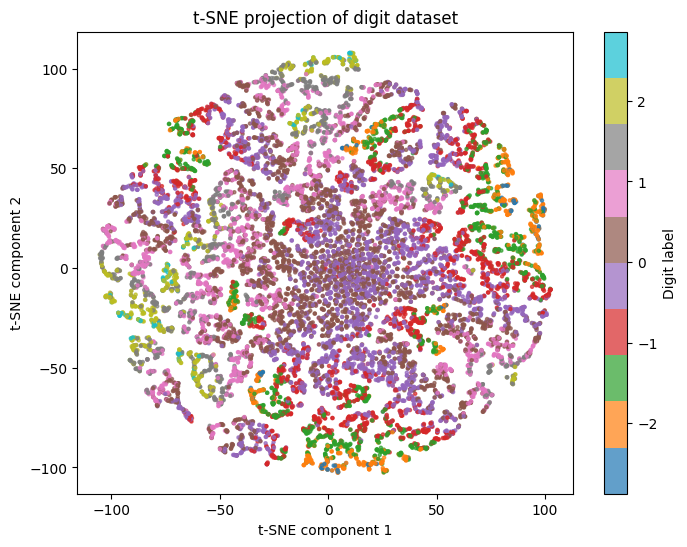

In [163]:
#plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y, cmap='tab10', alpha=0.7, s=5)
plt.colorbar(scatter, label="Digit label")  # legend for classes
plt.title("t-SNE projection of digit dataset")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

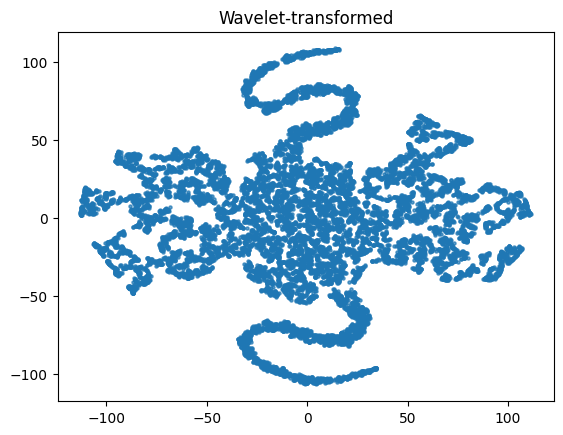

In [144]:
#wavelet
tsne_wavelet = TSNE(n_components=2, random_state=42, perplexity=30)
w_tsne = tsne_wavelet.fit_transform(data_wavelet)

#plot
plt.scatter(w_tsne[:,0], w_tsne[:,1], alpha=0.7, s=5)
plt.title("Wavelet-transformed")
plt.show()

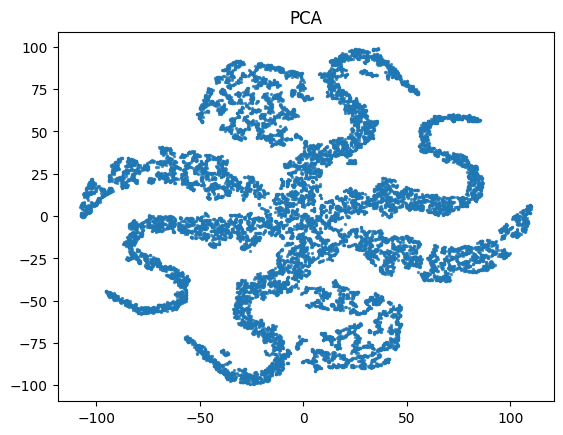

In [145]:
#PCA
tsne_pca = TSNE(n_components=2, random_state=42, perplexity=30)
p_tsne = tsne_pca.fit_transform(X_pca)

#plot
plt.scatter(p_tsne[:,0], p_tsne[:,1], alpha=0.7, s=2)
plt.title("PCA")
plt.show()


In [ ]:
#did the distance relationships stay consistent in each dimensionality reduction method? 

### 3. Your Own Metric
With the help of AI tools, find another metric that can be used to compare the dimensionality reduction techniques.

In [ ]:
def mse(original, reconstructed):
    return np.mean((original - reconstructed)**2)

#PCA
X_pca, comps = pca(ndf, n_components=4)
mean = np.mean(ndf, axis=0)              # center mean for reconstruction
X_rec_pca = X_pca @ comps + mean         # reconstruct from components
mse_pca = mse(ndf, X_rec_pca)

print("MSE PCA:", mse_pca)

#Haar Wavelet
#Keep first 4 coefficients
k = 4
X_wavelet = wavelet_transform(ndf, ndf.shape[1], ndf.shape[1])  # full coefficients
X_wave_reduced = X_wavelet.copy()
X_wave_reduced[:, k:] = 0                    # zero out discarded coefficients

# Reconstruct the original data from reduced Haar coefficients
X_wave_reduced[:, k:] = 0  # zero out discarded coefficients
X_rec_wave = X_wave_reduced @ H.T  # inverse transform
mse_wave = mse(ndf, X_rec_wave)
print("MSE Wavelet:", mse_wave)


MSE PCA: 0.5189004125887982
MSE Wavelet: 1.000541031377888


# Evaluation

When you finish your functions, you can run the following code blocs to verify your implementation.

In [165]:
import numpy as np

eval_data = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1.1, 0.9, 1, 1, 1, 1, 1, 1],
    [0.95, 1.05, 1, 1, 1, 1, 1, 1],
    [1, 1, 1.1, 0.9, 1, 1, 1, 1],
    [-1, -1, -1, -1, -1, -1, -1, -1],
    [-1.1, -0.9, -1, -1, -1, -1, -1, -1],
    [-0.95, -1.05, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1.1, -0.9, -1, -1, -1, -1]
])

def all_close(actual, expected, tol=1e-4, no_sign=False):

    if isinstance(expected, list):
        correct_1 = any([np.allclose(actual, e, atol=tol) for e in expected])
        correct_2 = any([np.allclose(np.abs(actual), np.abs(e), atol=tol) for e in expected]) if no_sign else False
        correct = correct_1 or correct_2
    else:
        correct = np.allclose(actual, expected, atol=tol) if not no_sign else np.allclose(np.abs(actual), np.abs(expected), atol=tol)
    
    if not correct:
        print("The function is NOT working correctly.")
        print("Expected result:")
        print(expected)
        print("Actual result:")
        print(actual)
    else:
        print("The function is working correctly.")
        print("Actual result:")
        print(actual)


In [166]:
# DISTANCE MATRIX
expected_result = np.array(
    [
        [0.    , 0.1414, 0.0707, 0.1414, 5.6569, 5.6586, 5.6573, 5.6586],
        [0.1414, 0.    , 0.2121, 0.2   , 5.6586, 5.6639, 5.6573, 5.6604],
        [0.0707, 0.2121, 0.    , 0.1581, 5.6573, 5.6573, 5.6586, 5.6591],
        [0.1414, 0.2   , 0.1581, 0.    , 5.6586, 5.6604, 5.6591, 5.6639],
        [5.6569, 5.6586, 5.6573, 5.6586, 0.    , 0.1414, 0.0707, 0.1414],
        [5.6586, 5.6639, 5.6573, 5.6604, 0.1414, 0.    , 0.2121, 0.2   ],
        [5.6573, 5.6573, 5.6586, 5.6591, 0.0707, 0.2121, 0.    , 0.1581],
        [5.6586, 5.6604, 5.6591, 5.6639, 0.1414, 0.2   , 0.1581, 0.    ]
    ]
)

actual_result = euclidean_distance_matrix(eval_data)
# compare the distance matrix with the expected result
all_close(actual_result, expected_result)

The function is working correctly.
Actual result:
[[0.         0.14142136 0.07071068 0.14142136 5.65685425 5.65862174
  5.65729617 5.65862174]
 [0.14142136 0.         0.21213203 0.2        5.65862174 5.6639209
  5.65729617 5.66038868]
 [0.07071068 0.21213203 0.         0.15811388 5.65729617 5.65729617
  5.65862174 5.65906353]
 [0.14142136 0.2        0.15811388 0.         5.65862174 5.66038868
  5.65906353 5.6639209 ]
 [5.65685425 5.65862174 5.65729617 5.65862174 0.         0.14142136
  0.07071068 0.14142136]
 [5.65862174 5.6639209  5.65729617 5.66038868 0.14142136 0.
  0.21213203 0.2       ]
 [5.65729617 5.65729617 5.65862174 5.65906353 0.07071068 0.21213203
  0.         0.15811388]
 [5.65862174 5.66038868 5.65906353 5.6639209  0.14142136 0.2
  0.15811388 0.        ]]


In [167]:
# wavelet transform with example in class
S = np.array([
    [2, 2, 0, 2, 3, 5, 4, 4],
])

expected_result = np.array([2.75, -1.25,  0.5,   0.,    0.,   -1.,   -1.,    0. ])
actual_result = wavelet_transform(S, haar_n=S.shape[1], reduced_n=8)
all_close(actual_result, expected_result)


The function is working correctly.
Actual result:
[[ 2.75 -1.25  0.5   0.    0.   -1.   -1.    0.  ]]


In [168]:
# wavelet
expected_result = np.array([
    [ 0.,  0.,  0.,  0.],
    [ 0.,  0.,  0.,  0.],
    [ 0.,  0.,  0.,  0.],
    [ 0.,  0., -0.,  0.],
    [ 0.,  0.,  0.,  0.],
    [-0., -0., -0.,  0.],
    [ 0.,  0.,  0.,  0.],
    [-0., -0.,  0.,  0.]]
    )

data = normalize_data(eval_data)
actual_result = wavelet_transform(data, haar_n=data.shape[1], reduced_n=4)
# compare the wavelet transformed data with the expected result
all_close(actual_result, expected_result)


The function is NOT working correctly.
Expected result:
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. -0.  0.]
 [ 0.  0.  0.  0.]
 [-0. -0. -0.  0.]
 [ 0.  0.  0.  0.]
 [-0. -0.  0.  0.]]
Actual result:
[[ 9.99589878e-01 -4.10122426e-04 -5.05943260e-04  0.00000000e+00]
 [ 9.99278716e-01 -7.21284088e-04 -1.12826658e-03  0.00000000e+00]
 [ 9.99745458e-01 -2.54541596e-04 -1.94781599e-04  0.00000000e+00]
 [ 9.98966244e-01 -1.03375595e-03  7.41323777e-04  0.00000000e+00]
 [-9.99589878e-01  4.10122426e-04  5.05943260e-04  0.00000000e+00]
 [-9.99278716e-01  7.21284088e-04  1.12826658e-03  0.00000000e+00]
 [-9.99745458e-01  2.54541596e-04  1.94781599e-04  0.00000000e+00]
 [-9.98966244e-01  1.03375595e-03 -7.41323777e-04  0.00000000e+00]]


In [189]:
# PCA
expected_result_center = np.array([
    [ 0.    ,  0.    ,  0.    ,  0.    ],
    [ 2.8284,  0.    ,  0.    ,  0.    ],
    [-2.8284,  0.    ,  0.    ,  0.    ],
    [ 0.    ,  2.8284,  0.    ,  0.    ],
    [ 0.    ,  0.    ,  0.    ,  0.    ],
    [-2.8284,  0.    , -0.    ,  0.    ],
    [ 2.8284,  0.    , -0.    ,  0.    ],
    [ 0.    , -2.8284,  0.    , -0.    ]])

expected_result_2_znorm = np.array([
    [ 0.    ,  0.    ,  0.    ,  0.    ],
    [ 2.    ,  0.    ,  0.    ,  0.    ],
    [-2.    ,  0.    ,  0.    ,  0.    ],
    [ 0.    ,  2.8284,  0.    ,  0.    ],
    [ 0.    ,  0.    ,  0.    ,  0.    ],
    [-2.    ,  0.    , -0.    ,  0.    ],
    [ 2.    ,  0.    , -0.    ,  0.    ],
    [ 0.    , -2.8284,  0.    , -0.    ]])

#data = normalize_data(eval_data)
#actual_result = pca(data, n_components=4) #
# compare the PCA transformed data with the expected result
#all_close(actual_result, [expected_result_center, expected_result_2_znorm], no_sign=True)
#X_pca, _, _ = pca(data, n_components=4)  # ignore var_ratio and components
#all_close(X_pca, [expected_result_center, expected_result_2_znorm], no_sign=True)
data = normalize_data(eval_data)
X_pca, _ = pca(data, 4)
all_close(X_pca, [expected_result_center, expected_result_2_znorm], no_sign=True)

The function is NOT working correctly.
Expected result:
[array([[ 0.    ,  0.    ,  0.    ,  0.    ],
       [ 2.8284,  0.    ,  0.    ,  0.    ],
       [-2.8284,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  2.8284,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ],
       [-2.8284,  0.    , -0.    ,  0.    ],
       [ 2.8284,  0.    , -0.    ,  0.    ],
       [ 0.    , -2.8284,  0.    , -0.    ]]), array([[ 0.    ,  0.    ,  0.    ,  0.    ],
       [ 2.    ,  0.    ,  0.    ,  0.    ],
       [-2.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  2.8284,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ],
       [-2.    ,  0.    , -0.    ,  0.    ],
       [ 2.    ,  0.    , -0.    ,  0.    ],
       [ 0.    , -2.8284,  0.    , -0.    ]])]
Actual result:
[[-2.82726655e+00  7.93375770e-03 -3.86915069e-02 -4.44089210e-16]
 [-2.82638932e+00 -1.28532003e-01 -2.27155864e-03 -5.55111512e-16]
 [-2.82770516e+00  7.61666379e-02 -5.69014810e-02 -3.33066907e-16]
 [-